In [2]:
import pandas as pd
import numpy as np
from crypto_utils import *
import matplotlib.pyplot as plt

In [3]:
api_url = "https://tradingstrategy.ai/api/"
data_service = DataService(api_url=api_url)
chain_data = data_service.get_chain_data()
selected_chain = chain_data.iloc[0]["slug"]
exchange_data = data_service.get_exchange_data(selected_chain=selected_chain)

n_exchange = 3
n_pairs = 5
time_bucket = "15m"

pairs_data = data_service.get_pairs_data(
    exc_slugs=exchange_data.iloc[0:n_exchange]["name"],
    chain_slugs=[selected_chain],
    n_pairs=n_pairs)
start_time = "2024-01-01"
end_time = "2024-01-02"
candle_dict = data_service.get_ohlcv_candles(list(pairs_data.index.values), start_time, end_time, time_bucket=time_bucket)
master_df = data_service.create_master_candle_df(candle_dict)

Candle data includes NaN values! Filling NaNs with either ffill or bfill


In [8]:
print(pairs_data)
#print(pairs_data.loc["239" + "1"])

          pair_slug pair_exchange
239        eth-usdt    uniswap-v2
1          eth-usdc    uniswap-v2
3366033  beam-eth-3    uniswap-v2
3212619    olas-eth    uniswap-v2
3017331   troll-eth    uniswap-v2


In [3]:
close_prices = data_service.get_close_prices(master_df)
log_returns = data_service.get_log_returns(close_prices)
log_returns.head()

,3212619_Close,3366033_Close,239_Close,1_Close,3017331_Close
2024-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
2024-01-01 00:15:00,0.006295,0.001024,0.000619,0.000028,0.0
2024-01-01 00:30:00,0.000239,-0.007442,-0.000022,0.000091,0.0
2024-01-01 00:45:00,0.000929,-0.004492,-0.000162,0.000139,0.0
2024-01-01 01:00:00,0.002129,-0.000043,0.000021,0.000068,0.0


<Axes: title={'center': 'Time series data from 2024-01-01T00:00:00.000000000 - 2024-01-02T00:00:00.000000000'}>

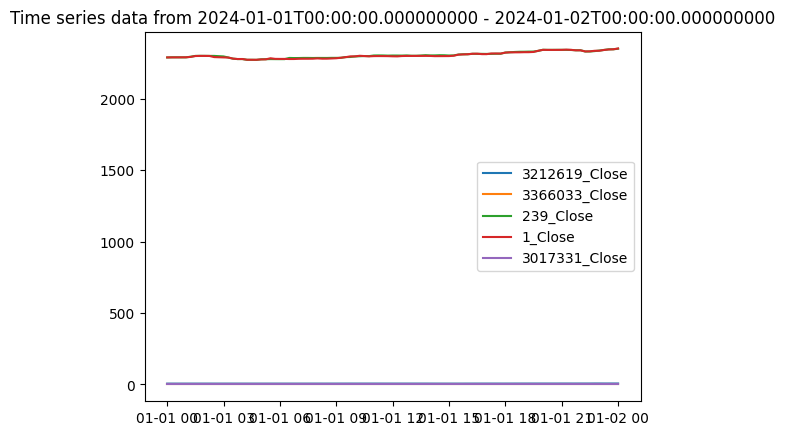

In [4]:
vis = Visualizer()
vis.get_time_series_plot(close_prices)

In [5]:
scaled_closes = data_service.scale_data(close_prices)
print(scaled_closes)
vis.get_time_series_plot(scaled_closes)

ValueError: Shape of passed values is (96, 4), indices imply (96, 5)